In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from spatter import *

In [2]:
my_filter = MySpatter()
my_filter.set_params({})
my_filter.apply_filter_video(input_path='videos/crowd_run_short_1920x1080_50.yuv', output_path='videos/tired.yuv')

In [3]:
sample_yuv_frames('videos/crowd_run_short_1920x1080_50.yuv', 'videos/shrt.yuv', 1920, 1080, num_frames=30)

Saved 15 frames to videos/shrt.yuv in YUV format


In [ ]:
tpe_sampler = optuna.samplers.TPESampler(
        n_startup_trials= 8, # объем разведки. Всегда настраивайте!
        n_ei_candidates=15, # влияет на "точность шага"
)
psnrs = [15,17.5, 20, 22.5,  25, 27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45, 47.5]
for psnr in psnrs:
    study = start_optimization(partial(my_filter.get_objective, input_path='videos/shrt.yuv', output_path='videos/res.yuv', needed_psnr=psnr), n_trials = 150, n_jobs = 1,
                           tpe_sampler = tpe_sampler)
    my_filter.set_params(study.best_trial.params)
    my_filter.apply_filter_video(input_path='videos/crowd_run_short_1920x1080_50.yuv')

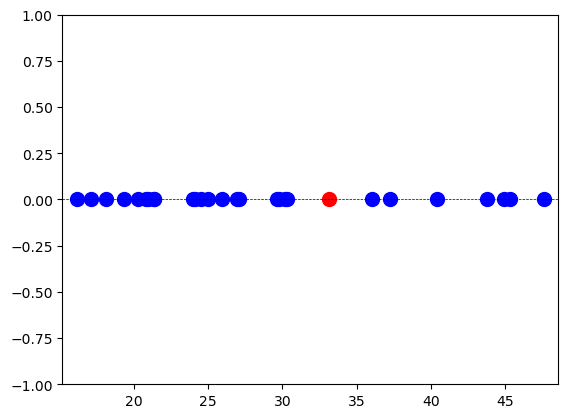

[33.15226999999999]

In [22]:
psnr_analyze('psnr_before.txt')

In [ ]:
psnr_file = 'smth.txt'
my_filter.first_set(psnr_file)
sample_yuv_frames('videos/crowd_run_short_1920x1080_50.yuv', 'videos/shrt.yuv', 1920, 1080, num_frames=30)
tpe_sampler = optuna.samplers.TPESampler(
        n_startup_trials= 8, # объем разведки. Всегда настраивайте!
        n_ei_candidates=15, # влияет на "точность шага"
)
added_params = []
for psnr in psnr_analyze(psnr_file):
    study = start_optimization(partial(my_filter.get_objective, input_path='videos/shrt.yuv', needed_psnr=psnr), n_trials = 150, n_jobs = 1,
                           tpe_sampler = tpe_sampler)
    my_filter.set_params(study.best_trial.params)
    psnr = my_filter.apply_filter_video(input_path='videos/crowd_run_short_1920x1080_50.yuv')
    added_params.append([study.best_trial.params, psnr])